Demonstration of QSVT circuits.

Cambridge Consultants 2024\
Walden Killick

Given a block-encoding circuit $U_A$, QSVT uses quantum signal processing techniques to transform the singular values of $A$ by a polynomial $p$, yielding a block-encoding of $p(A)$:
$$
\begin{bmatrix} A & \cdot \\\ \cdot & \cdot \end{bmatrix}
\xrightarrow{\text{QSVT}}
\begin{bmatrix} p(A) & \cdot \\\ \cdot & \cdot \end{bmatrix}.
$$
This notebook demonstrates how to use the `QSVT` class to construct the circuits carrying out this transformation. For an introduction to QSVT, see https://link.aps.org/doi/10.1103/PRXQuantum.2.040203.

In [6]:
import numpy as np

from qce24_qre_challenge.circuit import QSVT, BlockEncoding
from qce24_qre_challenge.quantum_oracle import BandedCirculantOracle
from qce24_qre_challenge.sparse_matrix import BandedCirculantMatrix

We begin by constructing the block-encoding circuit $U_A$ as in the block encoding notebook.

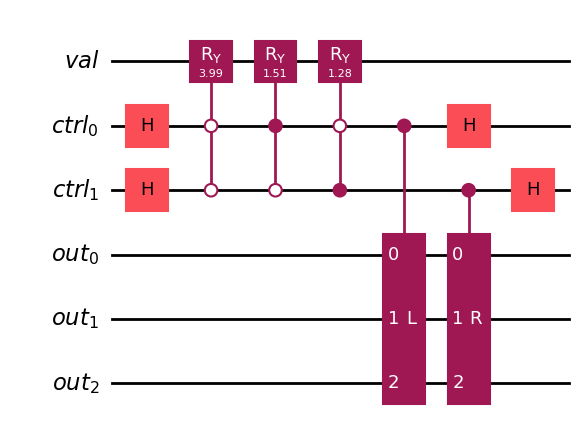

In [7]:
matrix = BandedCirculantMatrix(size=8)
banded_circulant_oracle = BandedCirculantOracle(matrix)

block_encoding = BlockEncoding(banded_circulant_oracle)

block_encoding_circuit = block_encoding.create_circuit()
block_encoding_circuit.draw('mpl')

QSVT performs the polynomial transformation $A \mapsto p(A)$ by interleaving applications of $U_A$ and $U_A^\dag$ with rotations in a subspace. The angles of these rotations determine the transformation which gets enacted on $A$.

In the interest of simplicity, for this demonstratory notebook we pick a random sequence of angles.

In [8]:
sequence_length = 5
ang_seq = np.random.rand(5)*np.pi

The `QSVT` class is instantiated using a `BlockEncoding` object and the sequence of rotation angles to perform, and optionally an initial state to prepare.

In [9]:
qsvt = QSVT(block_encoding, ang_seq)

Just like the `BlockEncoding`, the `create_circuit` attribute returns the full circuit.

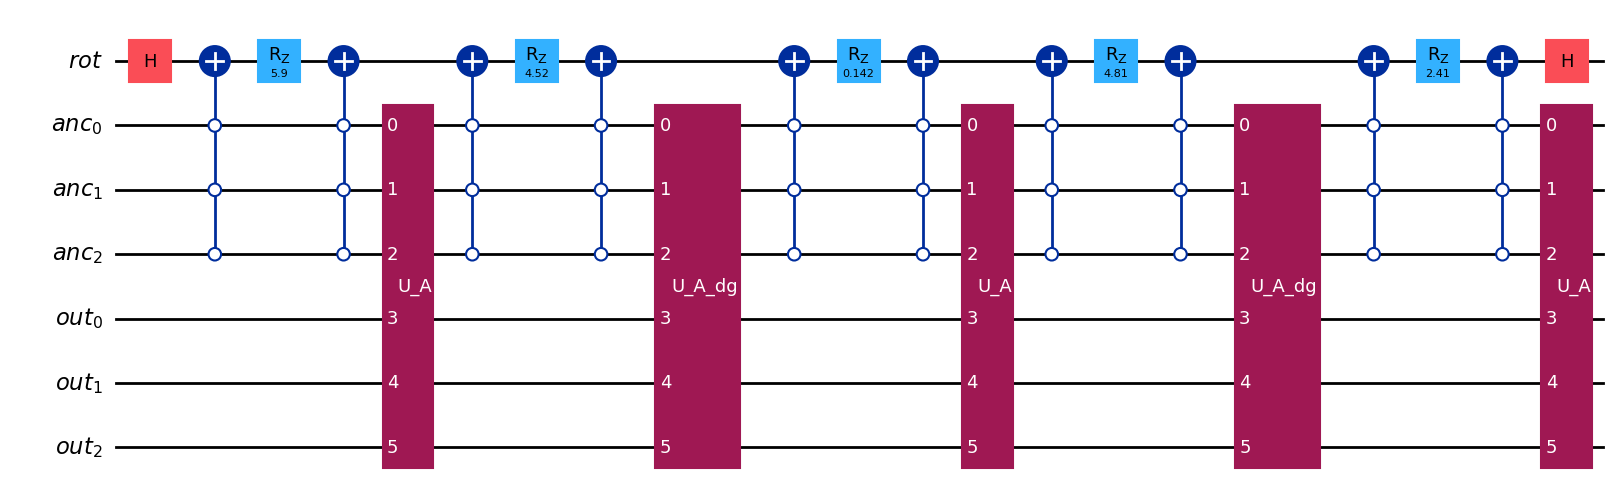

In [10]:
qsvt_circuit = qsvt.create_circuit()
qsvt_circuit.draw('mpl')